# Segmentation Capstone Project Design
## Question: 
- **Using a consumer segmentation about science/news, what can I learn about the different type of consumer, and knowing which segment they are in, can I think of a strategy to taget them using what I know and understand about their cluster (centroid)**
- **Can I accurately predict what segment someone falls into?**
    - Why this question is relevant: I am hypothesizing that the population (of the given survey) is segmented into different news interests and engagement. While this data is not specifically tied to a product, I plan on creating a line of analysis assuming I am some new provider looking to target different individuals and I want to come up with a strategy where I can efficiently target consumers who I know are more likely than others to use my procut. By creating this segmentation and model to predict new consumers into a segment, I am effectively coming up with a marketing/targeting strategy for each consumer to determine who will be most likely to engage with the product. 


## Steps: 
1. Segment the data into consumers using attitudinal and behavioral questions (using the segmentation variables)
    - Will probably go through some iterations of how best to segment
2. Profile the segments (using the profiling variables)
    - This step is purely analysis (no model building)
3. Given a new respondent, build a model that predicts which segment the new consumer falls into
    - Once I am happy with my segmentation I will build a model from variables which did not go in to my segmentation to predict a new consumer into a segment
    

## Data: 
- Data comes from Pew Research Center: http://www.pewinternet.org/datasets/2018/
- Specifically using the 2017 SCIENCE NEWS & INFORMATION QUESTIONNAIRE: http://www.pewinternet.org/dataset/2017-pew-research-center-science-and-news-survey/
    - Which contains general attitudes about news, preferences and behaviors surrounding news consumption and science
- 4,024 respondents
    - Might want to consider a subset of the data depending on the exploration process (i.e. only internet users)
    - ~250 features
    
## Variables
### Segmentation Variables



### Model Variables to predict segment
(NOT USING THE VARIABLES INCLUDED IN THE SEGMENTATION)
- Gender, Education, Income, Employment Status, How they feel about their career, political party etc.
- Will add/refine this list using feature selection to determine the best features to predict a segment


## Next Steps (Out of Scope)
- Ideally this segmentation would be linked to some product app where the segmentation would allow the app/marketers build a plan to target the most attractive segments
- Would love to incorporate spend data
- A/B Testing on marketing strategies to the most valuable segment
- Profit curve to determine the best segment to target

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [9]:
total_data = pd.read_csv('Data/SEGMENTATION/2017 Pew Research Center Science and News Survey/Segmentation_data.csv', index_col= 'CaseID')

## Data Exploration

##### Dropping Data
- Dropping all open ended data for now, it won't go in to the segmentation. 
    - Have the text data 
- Dropping tm_start, tm_finish
- Dropping XSpanish (did they or did take survey in spanish or english
- Dropping PPMSACAT, PPTO1_Col.... presence of children in the HH
- Dropping DOV Form (which openended were they shown) (WILL NEED IF WE USE OPEN ENDED)

In [10]:
dropped_data = total_data.drop(labels = ['weight', 'HOBBY2_1', 'HOBBY2_2', 'HOBBY2_3',
                            'GREATPAST_OE1', 'GREATPAST_OE2', 'GREATPAST_OE3', 
                            'GREATFUTURE_OE1', 'GREATFUTURE_OE2', 'GREATFUTURE_OE3',
                           'FAKE_OE1','FAKE_OE2', 'FAKE_OE3',
                           'DISAG_OE1', 'DISAG_OE2', 'DISAG_OE3',
                           'DECIS_OE1', 'DECIS_OE2', 'DECIS_OE3',
                           'tm_start', 'tm_finish',
                           'XSPANISH', 'PPT01_COL', 'PPT25_COL', 'PPT612_COL', 'PPT1317_COL', 'PPT18OV_COL', 
                           'DOV_FORM'], axis = 1)

In [11]:
dropped_data.iloc[:,0:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 6 to 4313
Data columns (total 100 columns):
duration           4024 non-null int64
LIFE               4024 non-null int64
MUSEUM_a           4024 non-null int64
MUSEUM_b           4024 non-null int64
MUSEUM_c           4024 non-null int64
MUSEUM_d           4024 non-null int64
MUSEUM_e           4024 non-null int64
MUSEUM_f           4024 non-null int64
MUSEUM_g           4024 non-null int64
MUSEUM_h           4024 non-null int64
MUSEUM_i           4024 non-null int64
MUSEUM_j           4024 non-null int64
MUSEUM_Refused     4024 non-null int64
TOPICINT_a         4024 non-null int64
TOPICINT_b         4024 non-null int64
TOPICINT_c         4024 non-null int64
TOPICINT_d         4024 non-null int64
TOPICINT_e         4024 non-null int64
TOPICINT_f         4024 non-null int64
SCIOFTEN           4024 non-null int64
TOPICS1            4024 non-null int64
TOPICS2_a          4024 non-null int64
TOPICS2_b          4024 non-null i

In [12]:
dropped_data.iloc[:,100:200].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 6 to 4313
Data columns (total 95 columns):
SNSPOST_j             4024 non-null object
SNSPOST_Refused       4024 non-null object
SNSCHECK1_a           4024 non-null object
SNSCHECK1_b           4024 non-null object
SNSCHECK1_c           4024 non-null object
SNSCHECK1_d           4024 non-null object
SNSCHECK1_e           4024 non-null object
SNSCHECK1_f           4024 non-null object
SNSCHECK1_Refused     4024 non-null object
SNSCHECK2_a           4024 non-null object
SNSCHECK2_b           4024 non-null object
SNSCHECK2_c           4024 non-null object
SNSCHECK2_d           4024 non-null object
SNSCHECK2_e           4024 non-null object
SNSCHECK2_f           4024 non-null object
SNSCHECK2_Refused     4024 non-null object
SNSNEW                4024 non-null object
SNSTRUST              4024 non-null object
PROBSET_a             4024 non-null int64
PROBSET_b             4024 non-null int64
PROBSET_c             4024 non-null

WE NOW HAVE 200 VARIABLES

##### Data Quality & Filtering respondents
- Filter out respondents who are outliers in how long it took them to take the survey (realistically could people take the survey in < 5 minutes?). Not capping the higher end since it is possible someone left their computer open, walked away and came back
> Out of the whole sample it took 85 people <5 minutes. I am removing them from the data

- Data is unweighted but contains a weight to match census (will need to use this). Actually think it might already be weighted based on the methodology doc

In [13]:
dropped_data['duration'].describe()

count     4024.000000
mean       344.999751
std       1597.232848
min          2.000000
25%         11.000000
50%         17.000000
75%         27.000000
max      16268.000000
Name: duration, dtype: float64

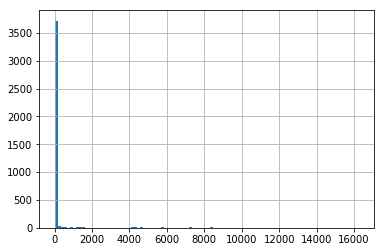

In [14]:
dropped_data['duration'].hist(bins = 100)
plt.show()

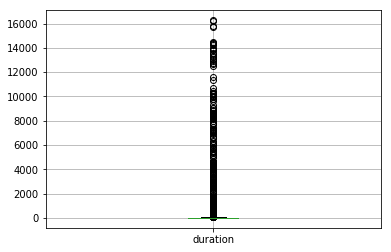

In [15]:
dropped_data.boxplot(column = 'duration')
plt.show()

In [16]:
filtered_data = dropped_data[dropped_data['duration'] >= 5]

In [17]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3941 entries, 6 to 4313
Columns: 195 entries, duration to AGE
dtypes: int64(157), object(38)
memory usage: 5.9+ MB


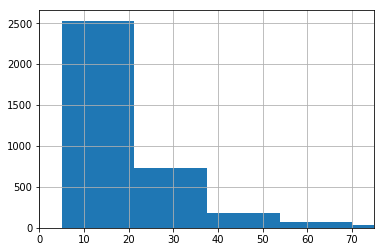

In [18]:
filtered_data['duration'].hist(bins = 1000)
plt.xlim(xmin = 0, xmax = 75)
plt.show()

## Building the Segmentation

In [19]:
filtered_data_drop = filtered_data.drop(labels= 'duration', axis = 1)

In [38]:
filtered_data_drop.iloc[:, 100:200].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3941 entries, 6 to 4313
Data columns (total 94 columns):
SNSPOST_Refused       3941 non-null object
SNSCHECK1_a           3941 non-null object
SNSCHECK1_b           3941 non-null object
SNSCHECK1_c           3941 non-null object
SNSCHECK1_d           3941 non-null object
SNSCHECK1_e           3941 non-null object
SNSCHECK1_f           3941 non-null object
SNSCHECK1_Refused     3941 non-null object
SNSCHECK2_a           3941 non-null object
SNSCHECK2_b           3941 non-null object
SNSCHECK2_c           3941 non-null object
SNSCHECK2_d           3941 non-null object
SNSCHECK2_e           3941 non-null object
SNSCHECK2_f           3941 non-null object
SNSCHECK2_Refused     3941 non-null object
SNSNEW                3941 non-null object
SNSTRUST              3941 non-null object
PROBSET_a             3941 non-null int64
PROBSET_b             3941 non-null int64
PROBSET_c             3941 non-null int64
PROBSET_d             3941 non-null 

#### These will be my core segmentation variables, with the potential to add from secondary or delete from here

In [77]:
#Core Segmentation Variables
segment_vars = ['TOPICINT_a', 'TOPICINT_b', 'TOPICINT_c', 'TOPICINT_d', 'TOPICINT_e', 'TOPICINT_f',
               'SCIOFTEN', 'TOPICS1', 'SOURCE1', 'SOURCE2', 'SEEK', 
                'SCIWHY_a', 'SCIWHY_b', 'SCIWHY_c', 'SCIWHY_d', 'SCIWHY_e', 'SCIWHY_g',
               'WHYNOT_a', 'WHYNOT_b', 'WHYNOT_c', 'WHYNOT_d', 'WHYNOT_e', 'WHYNOT_f', 'WHYNOT_g', 'WHYNOT_h']

#### May add these in to the segmentation later

In [78]:
#Secondary Segmentation Variables
segment_vars_second = ['PROBSET_a', 'PROBSET_b', 'PROBSET_c', 'PROBSET_d', 'PROBSET_e', 'PROBSET_f', 
                       'PROBSET_g', 'PROBSET_h', 
                       'ENTCRIM2', 'ENTHOSP2', 'ENTSCIFI2']

In [79]:
segment_data = filtered_data_drop[segment_vars]

In [80]:
segment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3941 entries, 6 to 4313
Data columns (total 25 columns):
TOPICINT_a    3941 non-null int64
TOPICINT_b    3941 non-null int64
TOPICINT_c    3941 non-null int64
TOPICINT_d    3941 non-null int64
TOPICINT_e    3941 non-null int64
TOPICINT_f    3941 non-null int64
SCIOFTEN      3941 non-null int64
TOPICS1       3941 non-null int64
SOURCE1       3941 non-null int64
SOURCE2       3941 non-null int64
SEEK          3941 non-null int64
SCIWHY_a      3941 non-null int64
SCIWHY_b      3941 non-null int64
SCIWHY_c      3941 non-null int64
SCIWHY_d      3941 non-null int64
SCIWHY_e      3941 non-null int64
SCIWHY_g      3941 non-null int64
WHYNOT_a      3941 non-null int64
WHYNOT_b      3941 non-null int64
WHYNOT_c      3941 non-null int64
WHYNOT_d      3941 non-null int64
WHYNOT_e      3941 non-null int64
WHYNOT_f      3941 non-null int64
WHYNOT_g      3941 non-null int64
WHYNOT_h      3941 non-null int64
dtypes: int64(25)
memory usage: 960.5 KB


In [95]:
segment_data['SOURCE1'].value_counts()

 2    2291
 1    1540
-1     110
Name: SOURCE1, dtype: int64

#### After exploring the data, there are a few (max 119) '-1' values, which I take as respondents who didn't answer the quesiton. I will remove these respondents when building the segmentation

In [96]:
segment_data[segment_data['TOPICS1'] == -1]

,TOPICINT_a,TOPICINT_b,TOPICINT_c,TOPICINT_d,TOPICINT_e,TOPICINT_f,SCIOFTEN,TOPICS1,SOURCE1,SOURCE2,...,SCIWHY_e,SCIWHY_g,WHYNOT_a,WHYNOT_b,WHYNOT_c,WHYNOT_d,WHYNOT_e,WHYNOT_f,WHYNOT_g,WHYNOT_h
CaseID,,,,,,,,,,,,,,,,,,,,,
102,4,4,4,4,4,4,4,-1,-1,-1,...,3,3,3,3,3,3,3,3,3,3
207,2,2,2,2,2,3,3,-1,2,2,...,2,3,3,3,3,3,3,3,3,2
209,4,2,4,4,4,4,4,-1,-1,-1,...,-1,3,3,3,3,3,3,3,3,3
267,1,2,2,2,3,3,4,-1,-1,-1,...,3,3,3,3,3,3,3,3,3,3
299,4,2,1,2,2,2,2,-1,-1,1,...,1,1,-1,-1,-1,-1,-1,-1,-1,-1
380,2,1,2,3,3,3,4,-1,-1,-1,...,2,3,3,3,3,3,3,3,3,3
484,4,4,4,4,4,4,4,-1,-1,-1,...,2,2,2,2,3,2,1,2,3,2
510,2,2,2,2,2,2,4,-1,2,2,...,2,3,3,3,3,2,2,2,3,3
579,2,1,4,4,4,1,4,-1,-1,-1,...,3,3,1,3,3,1,3,3,1,3


In [100]:
segment_data.replace(-1, np.NaN, inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [105]:
segment_data.dropna(inplace = True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### This is the final dataset to build the segmentation on

In [107]:
segment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 7 to 4313
Data columns (total 25 columns):
TOPICINT_a    3428 non-null float64
TOPICINT_b    3428 non-null float64
TOPICINT_c    3428 non-null float64
TOPICINT_d    3428 non-null float64
TOPICINT_e    3428 non-null float64
TOPICINT_f    3428 non-null float64
SCIOFTEN      3428 non-null float64
TOPICS1       3428 non-null float64
SOURCE1       3428 non-null float64
SOURCE2       3428 non-null float64
SEEK          3428 non-null float64
SCIWHY_a      3428 non-null float64
SCIWHY_b      3428 non-null float64
SCIWHY_c      3428 non-null float64
SCIWHY_d      3428 non-null float64
SCIWHY_e      3428 non-null float64
SCIWHY_g      3428 non-null float64
WHYNOT_a      3428 non-null float64
WHYNOT_b      3428 non-null float64
WHYNOT_c      3428 non-null float64
WHYNOT_d      3428 non-null float64
WHYNOT_e      3428 non-null float64
WHYNOT_f      3428 non-null float64
WHYNOT_g      3428 non-null float64
WHYNOT_h      3428 non-null f

#### Standardizing the Scale of the Variables

| V-Name | Description | NumScale | Scale|
|----|
|TOPICINT_a|Interest in Government News|1-4| Very Interested - Not at all Interested|
|TOPICINT_b|Interest in Local Comm. News|1-4| Very Interested - Not at all Interested|
|TOPICINT_c|Interest in Sports News|1-4| Very Interested - Not at all Interested|
|TOPICINT_d|Interest in Business/Finance News|1-4| Very Interested - Not at all Interested|
|TOPICINT_e|Interest in Science News|1-4| Very Interested - Not at all Interested|
|TOPICINT_f|Interest in Entertainment News|1-4| Very Interested - Not at all Interested|
|SCIOFTEN|Frequency follow science news|1-4| Nearly Everyday - Less often|
|TOPICS1|How get science news |1-2| 1:Couple topics 2: A lot of topics|
|SOURCE1|How get science news |1-2| 1:Couple sources 2: A lot of sources|
|SOURCE2|How get science news |1-2| 1:Sources that specialize 2: Sources cover general news|
|SEEK|How get science news |1-2| 1:Look for it 2: Happen accross it|
|SCIWHY_a|Reasons follow news: Enjoy talking about|1-3| Major Reason - Not a Reason|
|SCIWHY_b|Reasons follow news: Related to job|1-3| Major Reason - Not a Reason|
|SCIWHY_c|Reasons follow news: Helps make life descions|1-3| Major Reason - Not a Reason|
|SCIWHY_d|Reasons follow news: Social/civil obligation|1-3| Major Reason - Not a Reason|
|SCIWHY_e|Reasons follow news: Curious about|1-3| Major Reason - Not a Reason|
|SCIWHY_g|Reasons follow news: Related to personal hobbies|1-3| Major Reason - Not a Reason|
|WHYNOT_a|Reasons not follow news: Boring|1-3| Major Reason - Not a Reason|
|WHYNOT_b|Reasons not follow news: Hard to understand|1-3| Major Reason - Not a Reason|
|WHYNOT_c|Reasons not follow news: Disagree with it|1-3| Major Reason - Not a Reason|
|WHYNOT_d|Reasons not follow news: Not important|1-3| Major Reason - Not a Reason|
|WHYNOT_e|Reasons not follow news: Too busy|1-3| Major Reason - Not a Reason|
|WHYNOT_f|Reasons not follow news: Already get enough|1-3| Major Reason - Not a Reason|
|WHYNOT_g|Reasons not follow news: Sources regularly get dont cover|1-3| Major Reason - Not a Reason|
|WHYNOT_h|Reasons not follow news: Don't cover topics of interest|1-3| Major Reason - Not a Reason|

#### Looks like scales are standardized: 1 tends to be the most 'into science news'
- Might have to switch scales, want the 'major reason' to have more 'weight'
    - Try this later

In [113]:
segment_data.describe()

,TOPICINT_a,TOPICINT_b,TOPICINT_c,TOPICINT_d,TOPICINT_e,TOPICINT_f,SCIOFTEN,TOPICS1,SOURCE1,SOURCE2,...,SCIWHY_e,SCIWHY_g,WHYNOT_a,WHYNOT_b,WHYNOT_c,WHYNOT_d,WHYNOT_e,WHYNOT_f,WHYNOT_g,WHYNOT_h
count,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,...,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000
mean,1.985998,1.693699,2.611144,2.264586,2.023921,2.619312,2.780630,1.531214,1.595974,1.752917,...,1.711785,2.318553,2.716453,2.575554,2.728705,2.669778,2.429113,2.741540,2.462952,2.617853
std,0.919161,0.732023,1.064954,0.894006,0.834064,0.887649,0.994739,0.499098,0.490774,0.431378,...,0.700003,0.724763,0.546734,0.616719,0.537395,0.571727,0.673344,0.518411,0.653221,0.581644
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,4.000000,3.000000,2.000000,3.000000,4.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
